# Análisis de datos HAR

## Descargar los datos

Descargar la base de datos de [aquí](https://archive.ics.uci.edu/dataset/344/heterogeneity+activity+recognition)!

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [1]:
# Solucion

# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de archivos csv
phones_accelerometer= pd.read_csv("data/Activity recognition exp/Phones_accelerometer.csv")
phones_gyroscope= pd.read_csv("data/Activity recognition exp/Phones_gyroscope.csv")
watch_accelerometer= pd.read_csv("data/Activity recognition exp/Watch_accelerometer.csv")
watch_gyroscope= pd.read_csv("data/Activity recognition exp/Watch_gyroscope.csv")

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [ ]:
phones_accelerometer.info

In [ ]:
phones_accelerometer.describe()

In [3]:
# Solución
df_subset_ph_acc = phones_accelerometer
df_subset_ph_acc.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


**Interpretación:**



**Visualización extra:** Distribución de muestras por actividad.

In [ ]:
plt.figure(figsize=(8,4))

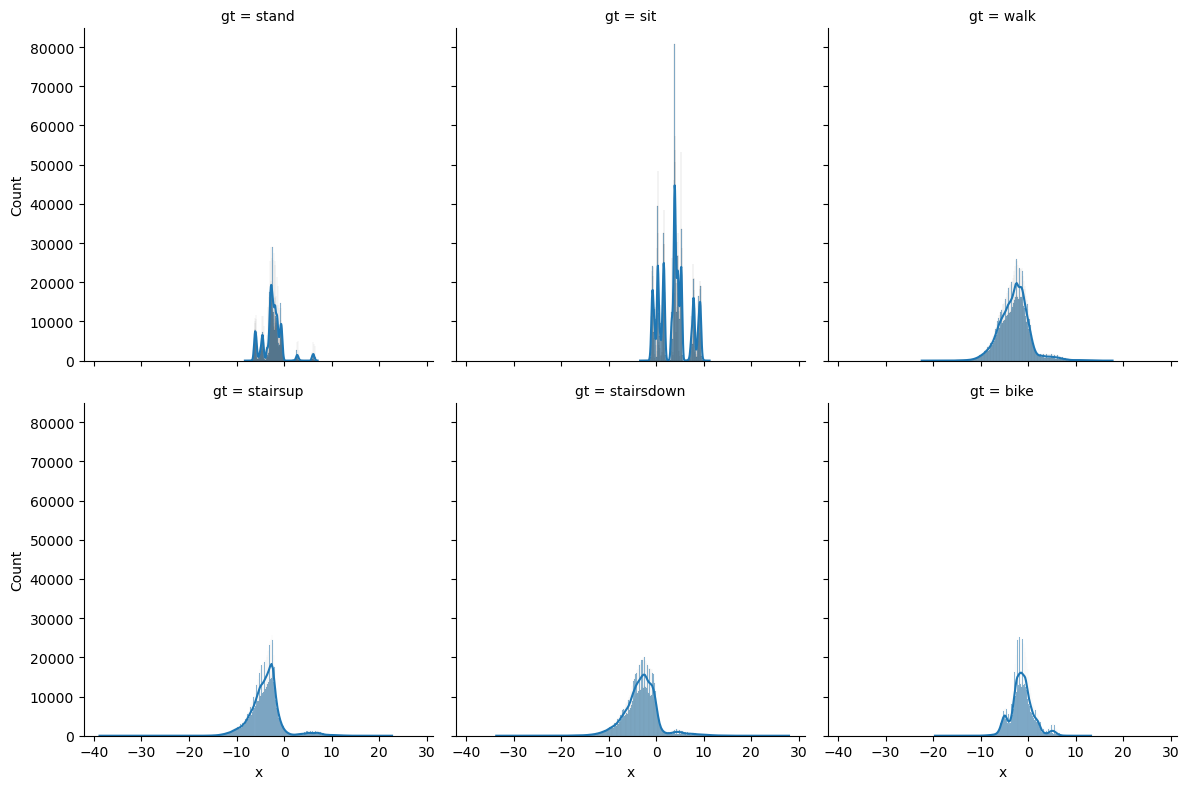

In [4]:
# Solución
# Create a facet grid for velocity by activity
g = sns.FacetGrid(df_subset_ph_acc, col="gt", col_wrap=3, height=4)
g.map(sns.histplot, "x", kde=True)

## Ejercicio 2: Estadísticas básicas de 'x', 'y', 'z'


🔹 **Qué hacer:** 
- Calcular media, desviación estándar, valores máximo y mínimo de las señales del acelerómetro ('x', 'y', 'z').
- Hacer un histograma de cada eje y Boxplots

🔹 **¿Por qué es importante?:** Ver rangos, outliers y planificar normalizaciones.

🔹 **Interpreta los resultados**


Estadísiticas básicas de las señales del acelerómetro:
                  x             y             z
count  1.306248e+07  1.306248e+07  1.306248e+07
mean  -1.704579e+00  1.595409e-01  8.931753e+00
std    3.859088e+00  1.552040e+00  2.262952e+00
min   -3.881207e+01 -2.249512e+01 -1.342387e+01
25%   -4.012682e+00 -6.961212e-01  7.738060e+00
50%   -2.145178e+00  1.532270e-01  9.063251e+00
75%   -1.532270e-01  1.037979e+00  9.921814e+00
max    2.792894e+01  2.080815e+01  3.931801e+01


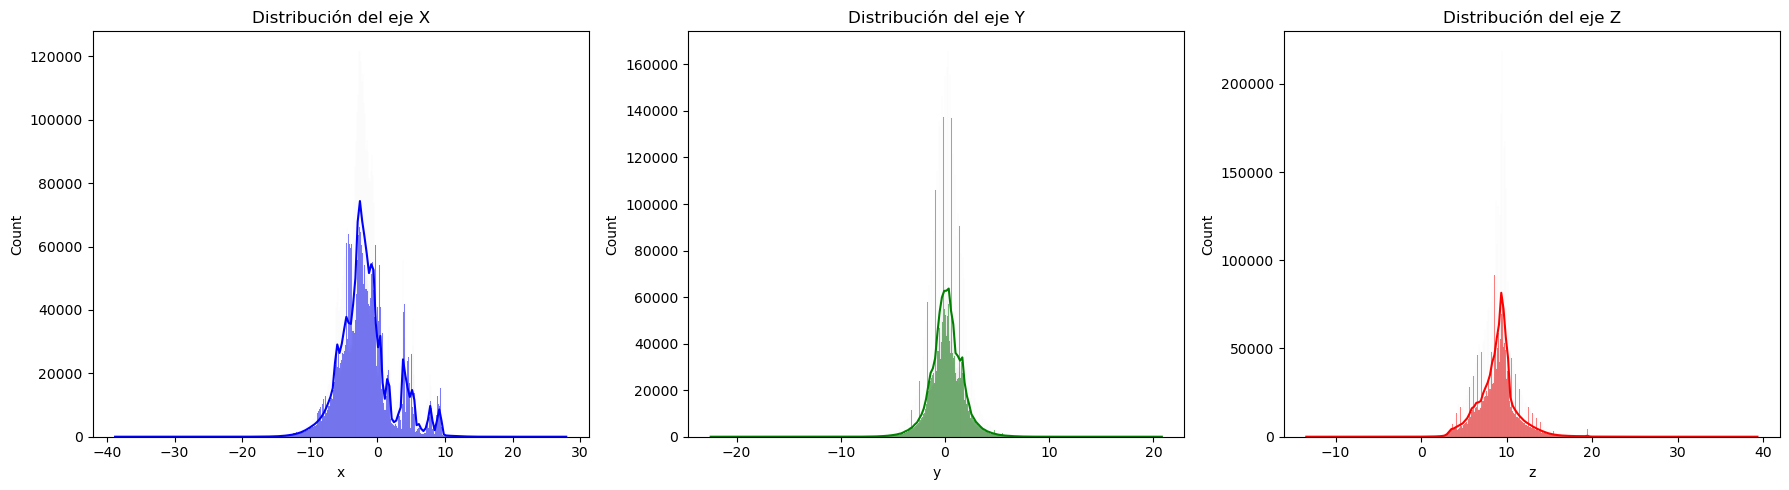

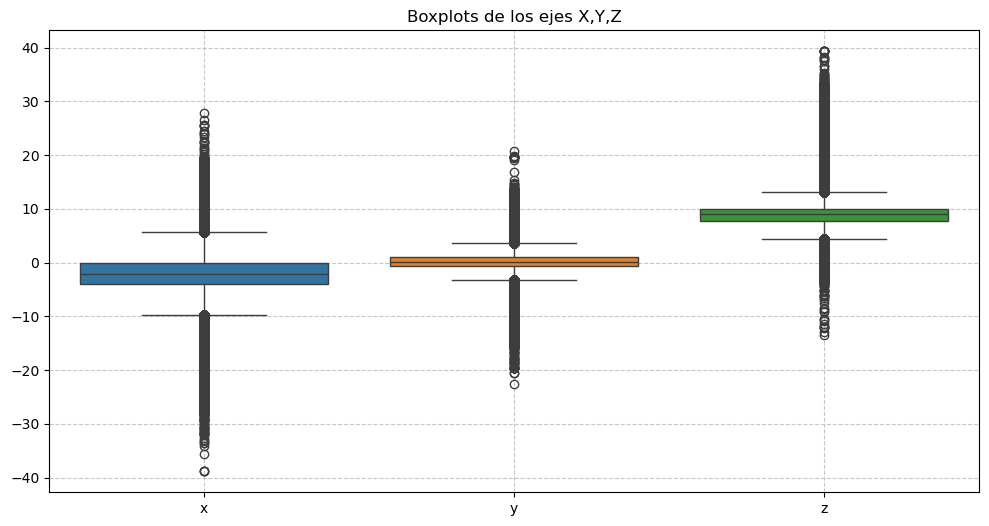

In [5]:
# Solución
stats= df_subset_ph_acc[["x","y","z"]].describe()
print("Estadísiticas básicas de las señales del acelerómetro:")
print(stats)

# Visualizar la distribución de cada eje con histogramas
fig, axes= plt.subplots(1, 3, figsize=(18,5))
axes[0].set_title("Distribución del eje X")
axes[1].set_title("Distribución del eje Y")
axes[2].set_title("Distribución del eje Z")

sns.histplot(df_subset_ph_acc["x"],kde=True,ax=axes[0],color="blue")
sns.histplot(df_subset_ph_acc["y"],kde=True,ax=axes[1],color="green")
sns.histplot(df_subset_ph_acc["z"],kde=True,ax=axes[2],color="red")

plt.tight_layout()
plt.show()

# Crear boxplots para visualizar outliers y distribuciones
plt.figure(figsize=(12,6))
sns.boxplot(data=df_subset_ph_acc[["x","y","z"]])
plt.title("Boxplots de los ejes X,Y,Z")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()

**Interpretación:**



**Visualización extra:** Histogramas de cada eje y Boxplots.

C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\4209285514.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\4209285514.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\4209285514.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)


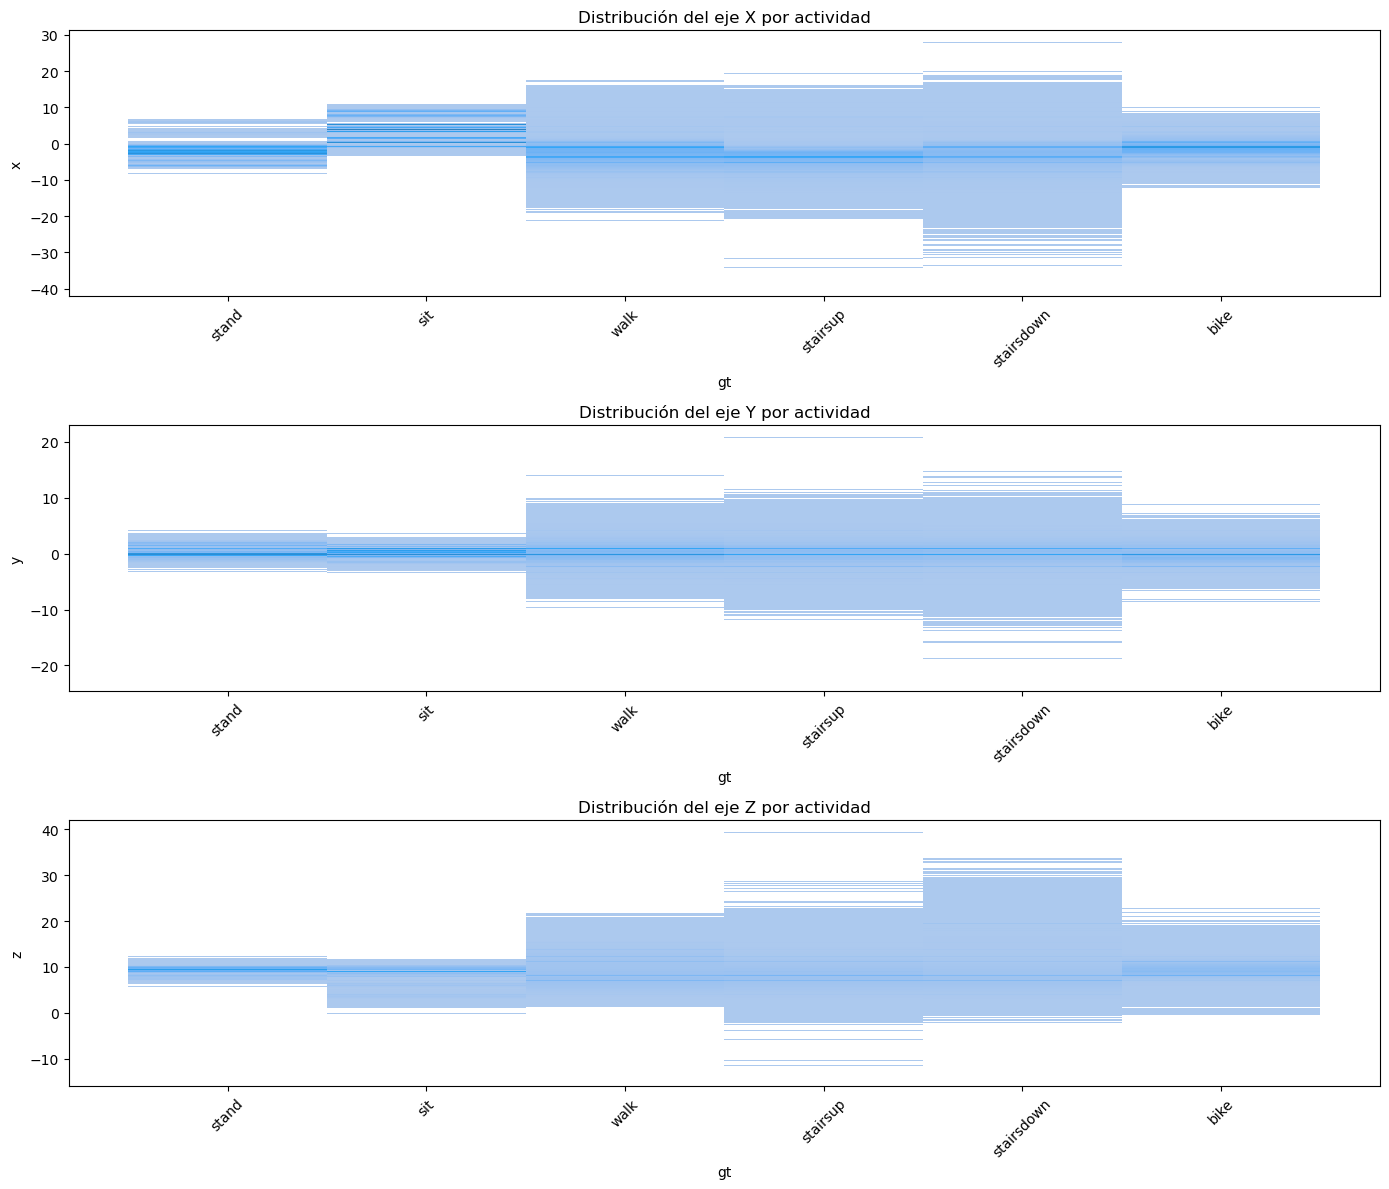

In [6]:
# Solución
fig, axes= plt.subplots(3, 1, figsize=(14,12))

sns.histplot(x="gt", y="x", data=df_subset_ph_acc,ax=axes[0])
axes[0].set_title("Distribución del eje X por actividad")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

sns.histplot(x="gt", y="y", data=df_subset_ph_acc,ax=axes[1])
axes[1].set_title("Distribución del eje Y por actividad")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

sns.histplot(x="gt", y="z", data=df_subset_ph_acc,ax=axes[2])
axes[2].set_title("Distribución del eje Z por actividad")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\1321828072.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\1321828072.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_15852\1321828072.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)


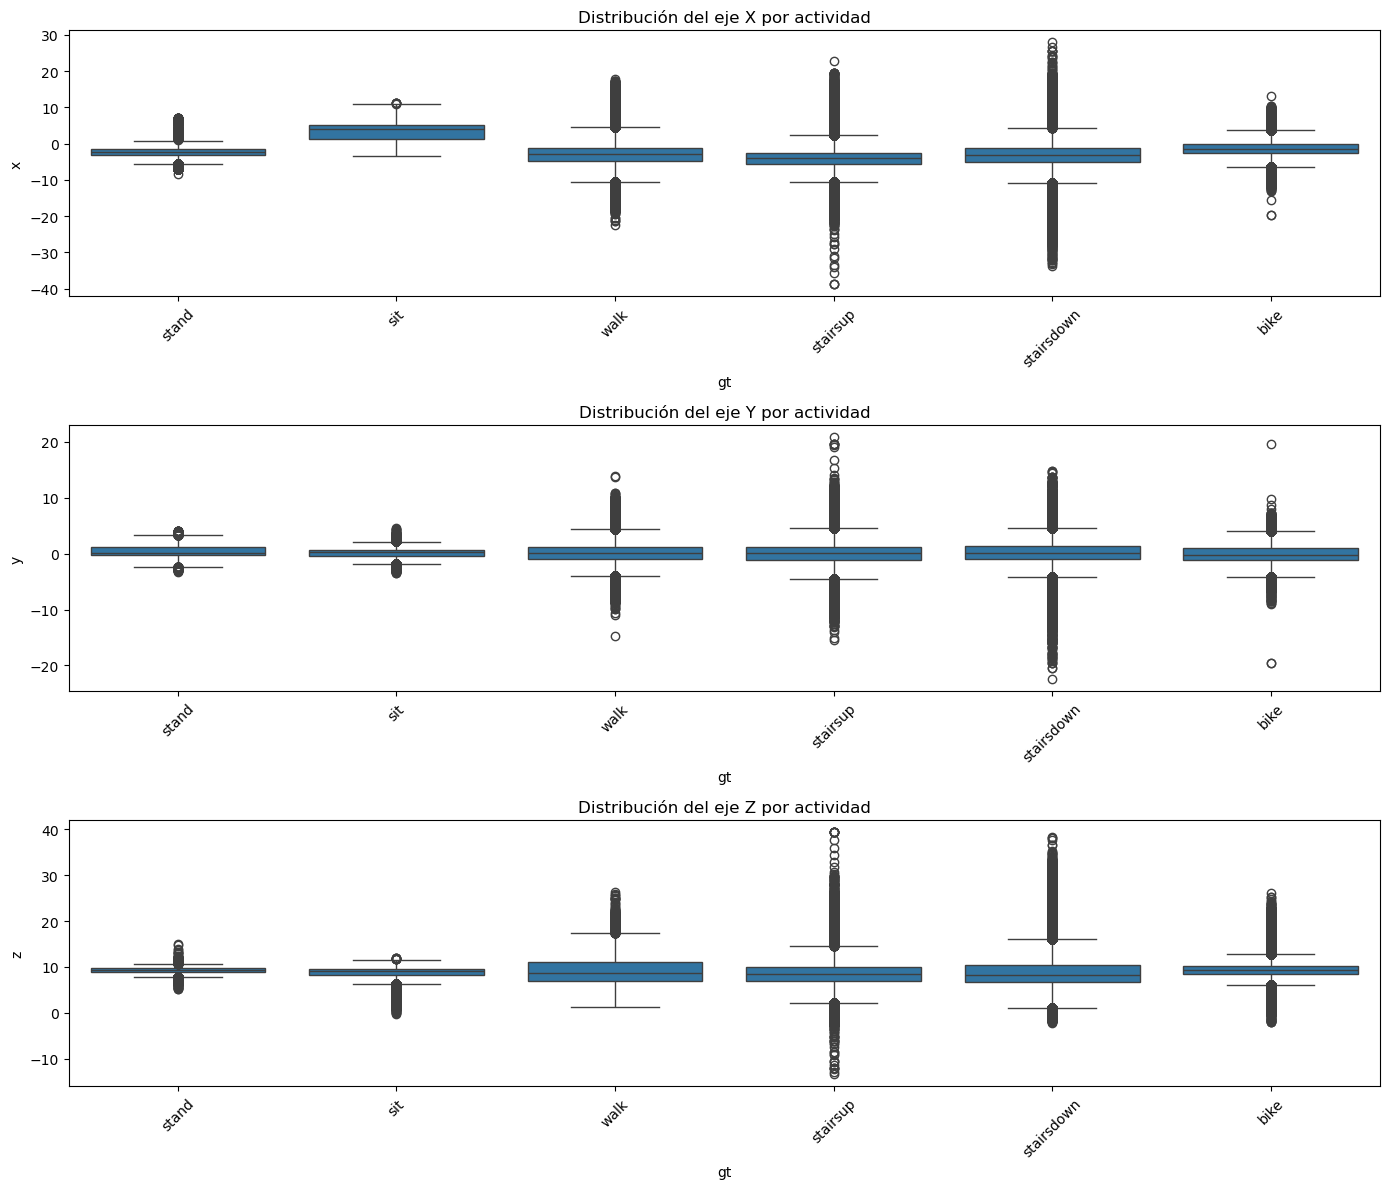

In [7]:
# Solución
fig, axes= plt.subplots(3, 1, figsize=(14,12))

sns.boxplot(x="gt", y="x", data= df_subset_ph_acc,ax=axes[0])
axes[0].set_title("Distribución del eje X por actividad")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

sns.boxplot(x="gt", y="y", data= df_subset_ph_acc,ax=axes[1])
axes[1].set_title("Distribución del eje Y por actividad")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

sns.boxplot(x="gt", y="z", data= df_subset_ph_acc,ax=axes[2])
axes[2].set_title("Distribución del eje Z por actividad")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


In [8]:
# Solución

df_walk= df_subset_ph_acc[df_subset_ph_acc["gt"]== "walk"]
df_sit= df_subset_ph_acc[df_subset_ph_acc["gt"]== "sit"]

print(f"Número de muestras para 'walk': {len(df_walk)}")
print(f"Número de muestras para 'sit': {len(df_sit)}")

Número de muestras para 'walk': 2192401
Número de muestras para 'sit': 1991919


**Interpretación:**



**Visualización extra:** Comparativa del número de muestras.

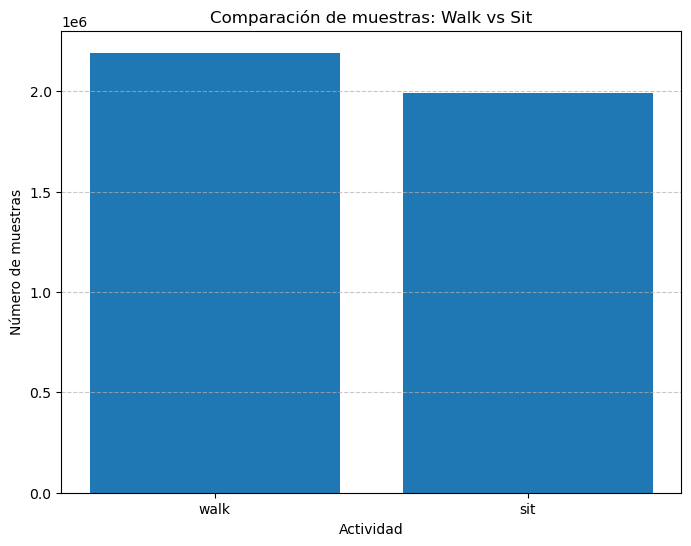

In [9]:
# Solución
acts= ["walk","sit"]
n= [len(df_walk), len(df_sit)]

plt.figure(figsize=(8,6))
plt.bar(acts,n)
plt.title("Comparación de muestras: Walk vs Sit")
plt.xlabel("Actividad")
plt.ylabel("Número de muestras")
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()


## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de `x`, `y`, `z`.
- Hacer un gráfico de barras de medias de `x`, `y`, `z` para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




In [10]:
# Solución
activities= phones_accelerometer["gt"].unique()
df_mean_activities= phones_accelerometer.groupby("gt")[["x","y","z"]].mean()
df_mean_activities

,x,y,z
gt,,,
bike,-1.337308,-0.068326,9.399014
sit,3.762870,0.155249,8.438220
stairsdown,-3.216161,0.198635,8.869204
stairsup,-3.903135,0.124511,8.482344
stand,-2.419891,0.353311,9.194293
walk,-2.909116,0.158189,9.070242


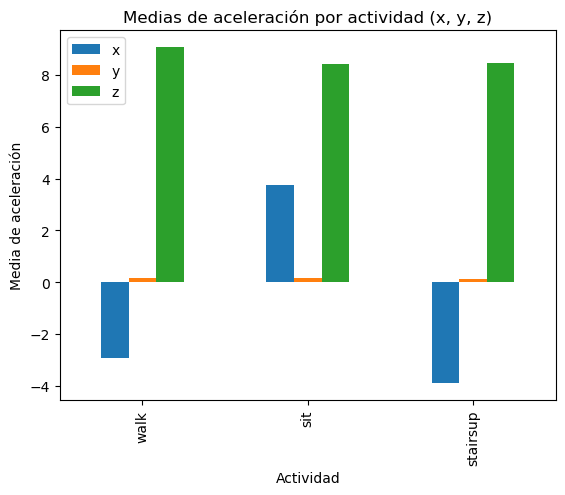

In [11]:
selection= ["walk","sit","stairsup"]
df_selected_acts= df_mean_activities.loc[selection]

df_selected_acts.plot(kind="bar")
plt.title("Medias de aceleración por actividad (x, y, z)")
plt.xlabel("Actividad")
plt.ylabel("Media de aceleración")
plt.show()

## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

Primeras filas mostrando gt y activity_type
      gt activity_type
0  stand      Estática
1  stand      Estática
2  stand      Estática
3  stand      Estática
4  stand      Estática




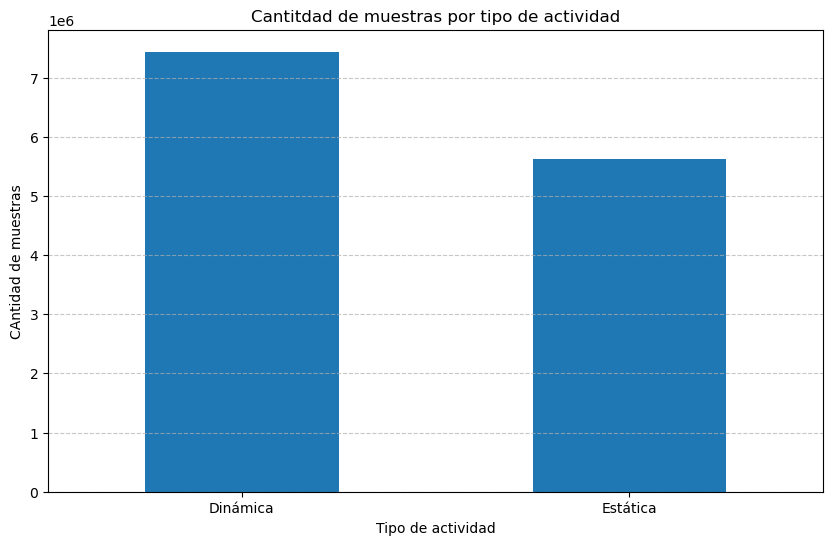

In [12]:
# Solución
# Creación de columna nueva "activity_type"
dynamic_acts= ["walk","stairsup","stairsdown","bike"]
df_subset_ph_acc["activity_type"]= df_subset_ph_acc["gt"].apply(lambda x: "Dinámica" if x in dynamic_acts else "Estática")

# Mostrar primeras filas con columnas gt y activity_type
print("Primeras filas mostrando gt y activity_type")
print(df_subset_ph_acc[["gt", "activity_type"]].head())
print("\n")

#Crear gráfico de barras con cantidad de muestras por tipo de actividad
plt.figure(figsize=(10,6))
activity_counts= df_subset_ph_acc["activity_type"].value_counts()
activity_counts.plot(kind="bar")
plt.title("Cantitdad de muestras por tipo de actividad")
plt.xlabel("Tipo de actividad")
plt.ylabel("CAntidad de muestras")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

**Interpretación**

## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj?  
- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  
- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?


In [14]:
watch_accelerometer.describe()
watch_accelerometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540962 entries, 0 to 3540961
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(3), int64(3), object(4)
memory usage: 270.2+ MB


In [15]:
# Solución
acts_06 = ["walk","sit"]

ph_acc_common= phones_accelerometer[phones_accelerometer["gt"].isin(acts_06)]
wat_acc_common= watch_accelerometer[watch_accelerometer["gt"].isin(acts_06)]

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

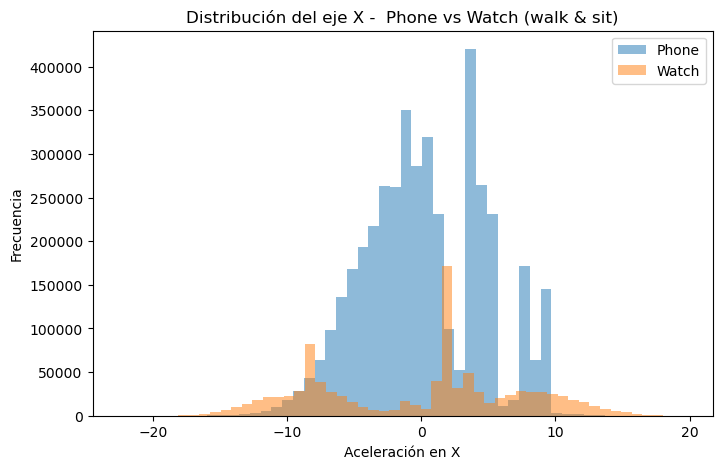

In [ ]:
# Solución
plt.figure(figsize=(8,5))

plt.hist(ph_acc_common["x"], bins=50, alpha=0.5, label="Phone")
plt.hist(wat_acc_common["x"], bins=50, alpha=0.5, label="Watch")

plt.title("Distribución del eje X -  Phone vs Watch (walk & sit)")
plt.xlabel("Velocidad en X")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

**Interpretación**

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?
- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?
- ¿Podría ser interesante combinar la información de ambos sensores?


In [18]:
# Solución
# Filtración de datos de giroscopio
acts_07= ["walk","sit"]
ph_gyr_common= phones_gyroscope[phones_gyroscope["gt"].isin(acts_07)]

**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

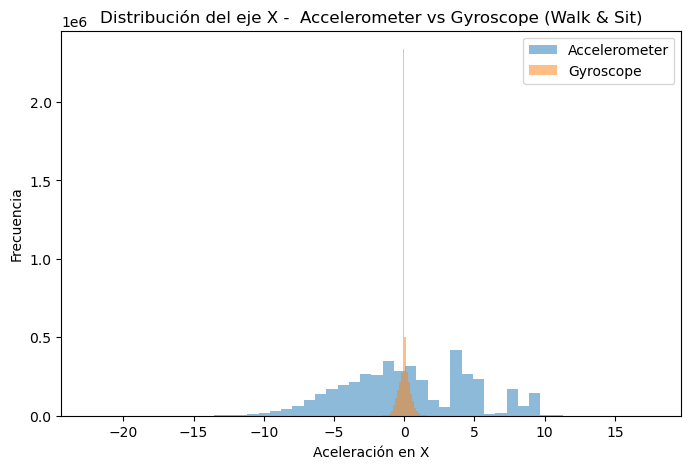

In [ ]:
# Solución
plt.figure(figsize=(8,5))

plt.hist(ph_acc_common["x"], bins=50, alpha=0.5, label="Accelerometer")
plt.hist(ph_gyr_common["x"], bins=50, alpha=0.5, label="Gyroscope")

plt.title("Distribución del eje X -  Accelerometer vs Gyroscope (Walk & Sit)")
plt.xlabel("Velocidad en X")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

**Interpretación**

## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes `x`, `y`, `z`, ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?
- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?
- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?


In [24]:
ph_acc_common.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4184320 entries, 55828 to 12987898
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
 10  activity_type  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 383.1+ MB


In [25]:
ph_gyr_common.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4568930 entries, 55831 to 13932142
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(3), int64(3), object(4)
memory usage: 383.4+ MB


In [31]:
# Solución
ph_acc= ph_acc_common[["Creation_Time", "x","y","z"]].rename(
    columns={"x":"x_acc", "y":"y_acc", "z":"z_acc"})

ph_gyr= ph_gyr_common[["Creation_Time", "x","y","z"]].rename(
    columns={"x":"x_gyr","y":"y_gyr", "z":"z_gyr"})

df_combined= pd.merge(ph_acc,ph_gyr, on="Creation_Time",how="inner")
df_combined.head()

,Creation_Time,x_acc,y_acc,z_acc,x_gyr,y_gyr,z_gyr
0,5895885597000,3.166332,0.481235,8.892065,-0.011223,-0.005855,-0.008295
1,5902155434000,3.125630,0.416591,8.905233,-0.006831,-0.010735,0.004636
2,5902195412000,3.123236,0.420182,8.846576,-0.007807,-0.012199,0.004636
3,5903625588000,3.142390,0.471658,8.882488,-0.013663,-0.011223,-0.004392
4,6160374675000,-8.085219,1.095347,11.631032,-0.383535,-0.199331,0.692413


In [32]:
corr= df_combined[["x_acc","y_acc","z_acc","x_gyr","y_gyr","z_gyr"]].corr()
corr

,x_acc,y_acc,z_acc,x_gyr,y_gyr,z_gyr
x_acc,1.000000,0.171672,-0.294792,0.151412,0.059593,-0.157990
y_acc,0.171672,1.000000,0.115550,-0.180172,0.154976,0.013012
z_acc,-0.294792,0.115550,1.000000,-0.737042,0.050789,0.328988
x_gyr,0.151412,-0.180172,-0.737042,1.000000,-0.482664,-0.188202
y_gyr,0.059593,0.154976,0.050789,-0.482664,1.000000,-0.666623
z_gyr,-0.157990,0.013012,0.328988,-0.188202,-0.666623,1.000000


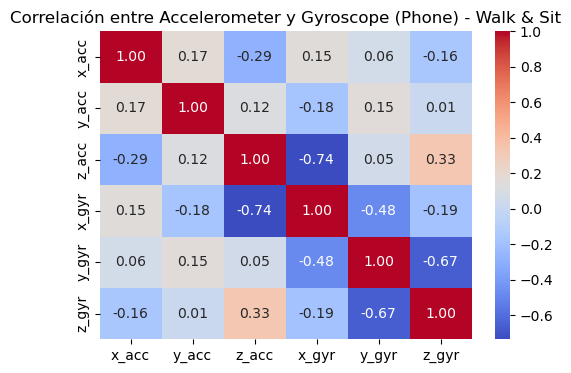

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre Accelerometer y Gyroscope (Phone) - Walk & Sit")
plt.show()

**Interpretación**